In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ds=pd.read_csv('skyserver.csv')

In [3]:
ds.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [4]:
ds.dtypes

objid        float64
ra           float64
dec          float64
u            float64
g            float64
r            float64
i            float64
z            float64
run            int64
rerun          int64
camcol         int64
field          int64
specobjid    float64
class         object
redshift     float64
plate          int64
mjd            int64
fiberid        int64
dtype: object

In [5]:
for i in ds.columns:
    print("\033[1m"+i+"\033[0m",ds[i].unique())
    print('----------')

objid [1.23765e+18]
----------
ra [183.5313257 183.5983705 183.6802074 ... 131.5525623 131.4771511
 131.6650121]
----------
dec [ 0.08969303  0.13528503  0.12618509 ... 51.66698638 51.75306779
 51.80530747]
----------
u [19.47406 18.6628  19.38298 ... 18.75818 18.88287 19.27586]
----------
g [17.0424  17.21449 18.19169 ... 17.77784 17.91068 17.37829]
----------
r [15.94699 16.67637 17.47428 ... 17.51872 17.53152 16.30542]
----------
i [15.50342 16.48922 17.08732 ... 17.43302 17.36284 15.83548]
----------
z [15.22531 16.3915  16.80125 ... 17.42048 17.13988 15.50588]
----------
run [ 752  756  308  727  745 1035 1045 1140 1231 1332 1334 1302 1239 1119
 1331 1345 1350 1404 1412 1336 1402 1411 1356]
----------
rerun [301]
----------
camcol [4 2 1 5 6 3]
----------
field [267 268 269 270 271 272 273 274 275 276 277 278 279 293 294 295 296 297
 298 299 300 301 302 303 304 305 306 307 308 309 310 311 312 313 502 503
 504 505 506 508 509 510 511 512 515 516 517 518 519 520 521 522 104 105
 110

In [6]:
categorical_column = ['camcol','run']
ds.drop(['rerun','objid'],inplace=True,axis=1)

In [7]:
print(ds.isna().sum())
print(ds.isnull().sum())

ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64


In [8]:
ds.describe()

,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,3.648700,302.380100,1.645022e+18,0.143726,1460.986400,52943.533300,353.069400
std,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,1.666183,162.577763,2.013998e+18,0.388774,1788.778371,1511.150651,206.298149
min,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,1.000000,11.000000,2.995780e+17,-0.004136,266.000000,51578.000000,1.000000
25%,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,2.000000,184.000000,3.389248e+17,0.000081,301.000000,51900.000000,186.750000
50%,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,4.000000,299.000000,4.966580e+17,0.042591,441.000000,51997.000000,351.000000
75%,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,5.000000,414.000000,2.881300e+18,0.092579,2559.000000,54468.000000,510.000000
max,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,6.000000,768.000000,9.468830e+18,5.353854,8410.000000,57481.000000,1000.000000


1. minimum right ascention is 8.235 and max is 260.884, suggests that ra is varied over a large range
2. the 5 bands of telescope (u,g,r,i,z) have almost same range, their means,std are comparable.
3. camcol is a categorical variable
4. field value varies from 11 to 768 so this can be considered a hugely varied column
5. difference between 75% and max is high in redshift.
6. specobjid,plate number,mjd,fiberID can be dropped as it does not anyway affect the target

In [9]:
ds.drop(['specobjid','plate','mjd','fiberid'],inplace=True,axis=1)

In [10]:
ds.head()

,ra,dec,u,g,r,i,z,run,camcol,field,class,redshift
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,4,267,STAR,-0.000009
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,4,267,STAR,-0.000055
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,4,268,GALAXY,0.123111
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,4,269,STAR,-0.000111
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,4,269,STAR,0.000590


In [11]:
#encoding target variable
mapping_dict = {'class':{'STAR':0,'GALAXY':1,'QSO':2}}
ds.replace(mapping_dict,inplace=True)

ra             AxesSubplot(0.125,0.536818;0.110714x0.343182)
dec         AxesSubplot(0.257857,0.536818;0.110714x0.343182)
u           AxesSubplot(0.390714,0.536818;0.110714x0.343182)
g           AxesSubplot(0.523571,0.536818;0.110714x0.343182)
r           AxesSubplot(0.656429,0.536818;0.110714x0.343182)
i           AxesSubplot(0.789286,0.536818;0.110714x0.343182)
z                 AxesSubplot(0.125,0.125;0.110714x0.343182)
run            AxesSubplot(0.257857,0.125;0.110714x0.343182)
camcol         AxesSubplot(0.390714,0.125;0.110714x0.343182)
field          AxesSubplot(0.523571,0.125;0.110714x0.343182)
class          AxesSubplot(0.656429,0.125;0.110714x0.343182)
redshift       AxesSubplot(0.789286,0.125;0.110714x0.343182)
dtype: object

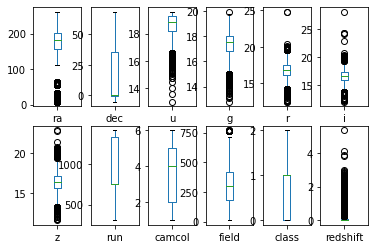

In [12]:
ds.plot(kind='box',subplots=True,layout = (2,6))

In [13]:
#treat outliers using the zscore method
from scipy.stats import zscore
z_score=abs(zscore(ds))
print(ds.shape)
ds_fin = ds.loc[(z_score<3).all(axis=1)]
print(ds_fin.shape)

(10000, 12)
(9097, 12)


In [14]:
for i in ('run','camcol','field'):
    print(i,ds[i].unique())

run [ 752  756  308  727  745 1035 1045 1140 1231 1332 1334 1302 1239 1119
 1331 1345 1350 1404 1412 1336 1402 1411 1356]
camcol [4 2 1 5 6 3]
field [267 268 269 270 271 272 273 274 275 276 277 278 279 293 294 295 296 297
 298 299 300 301 302 303 304 305 306 307 308 309 310 311 312 313 502 503
 504 505 506 508 509 510 511 512 515 516 517 518 519 520 521 522 104 105
 110 111 112 113 114 115 116  25  26  28  29  90  91  92  93  95  74  70
  71  66 103 538 539 567 568 571 573 575 576 579 580 411 414 415 416 417
 418 420 421 422 424 425 426 427 428 430 431 432 435 437 438 439 440 442
 443 280 281 282 283 284 285 286 287 288 289 244 245 246 249 251 252 253
 254 255 256 257 258 259 260 261 262 263 314 315 316 318 319 320 321 322
 323 324 325 326 523 524 525 526 527 528 529 530 531 581 583 584 585 591
 607 608 167 169 536 540 563 569 570 577 588 590 598 602 606 205 446 197
 199 200 201 202 203 207 208 209 210 211 213 214 215 216 217 218 219 220
 290 291 292 221 222 223 224 225 226 227 444 445

In [15]:
numerical_col = ['ra','dec','u','g','r','i','z','redshift','field']

univariate analysis

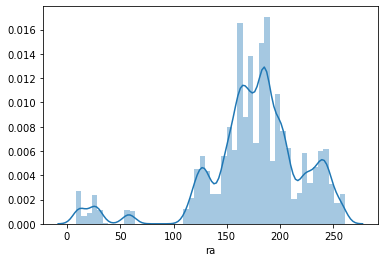

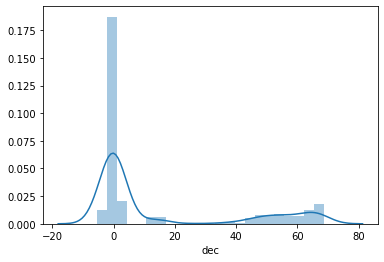

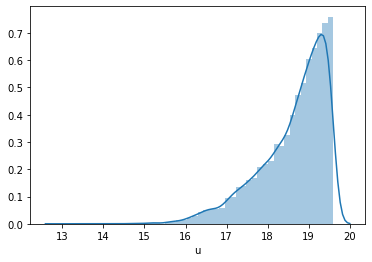

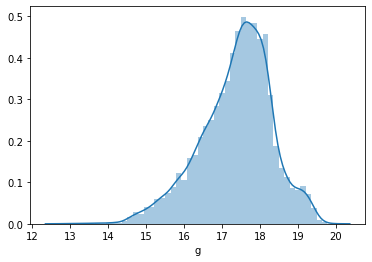

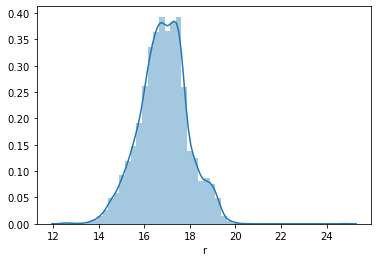

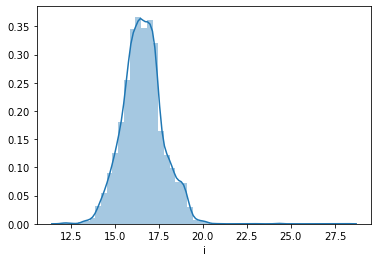

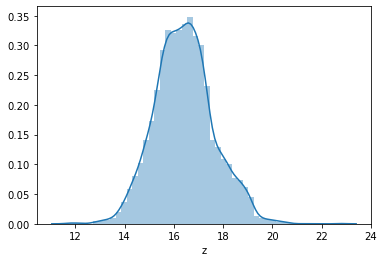

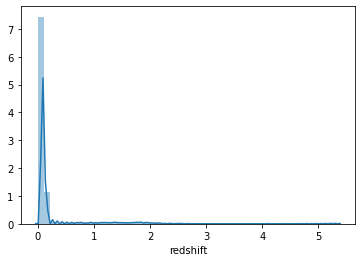

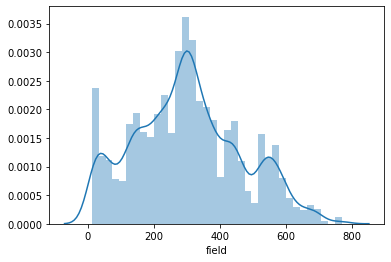

In [16]:
for i in numerical_col:
    sns.distplot(ds[i])
    plt.show()

1. checking the distribution of data individually, we can see that u,dec, redshift are heavily skewed columns
2. z,i,g are mildly skewed

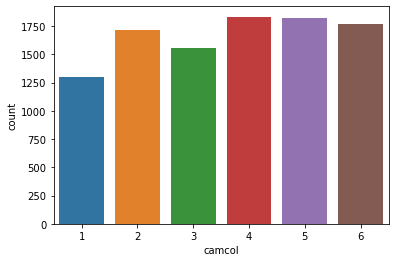

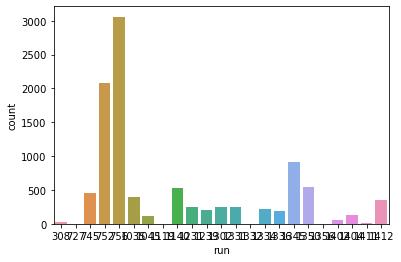

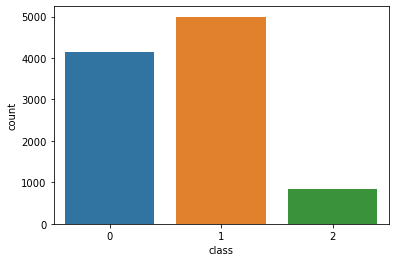

In [17]:
for i in ('camcol','run','class'):
    sns.countplot(ds[i])
    plt.show()

1. checking distribution of target we can see aroud 4100 stars in data, 4850 galaxies and only about 800 quasars
2. most are galaxies in the dataset

In [18]:
ds_fin.shape

(9097, 12)

In [19]:
ds_fin['class'].value_counts()

1    4793
0    3869
2     435
Name: class, dtype: int64

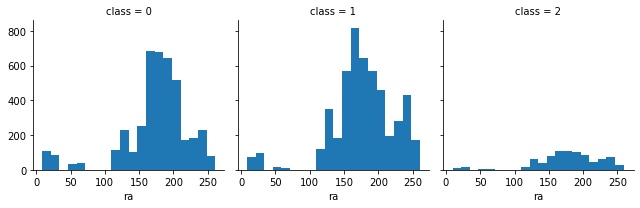

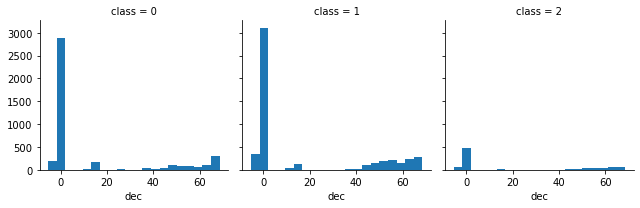

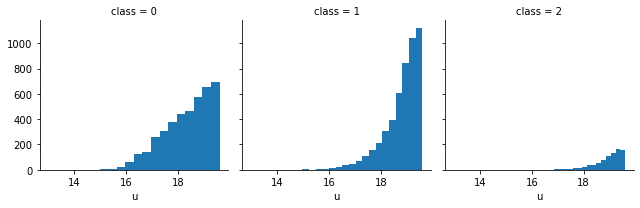

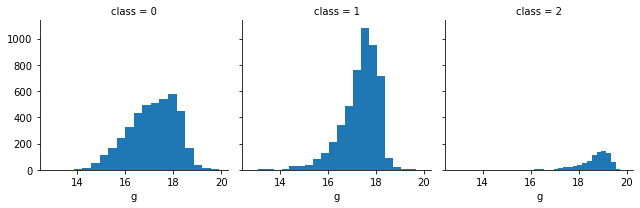

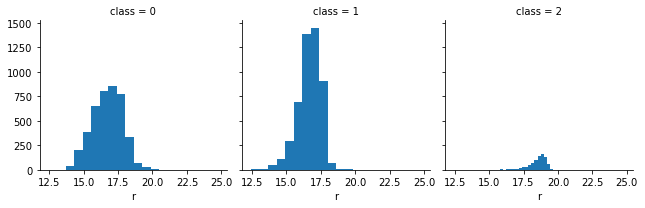

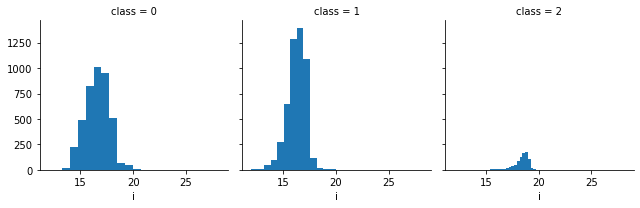

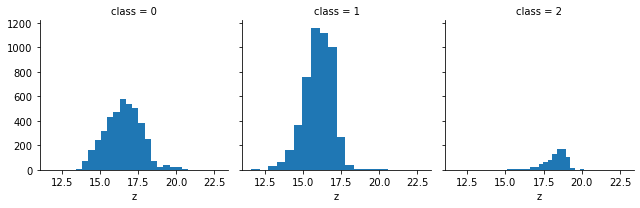

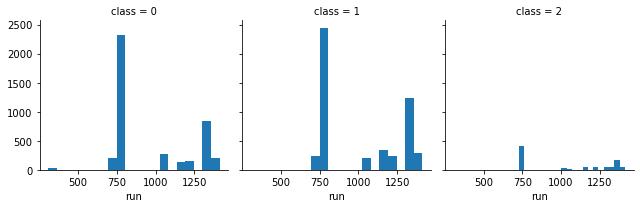

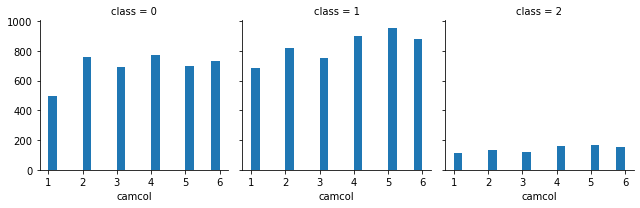

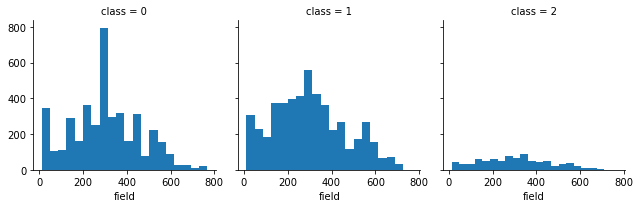

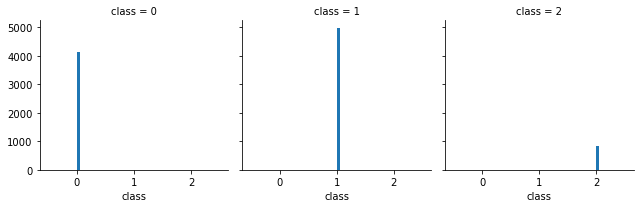

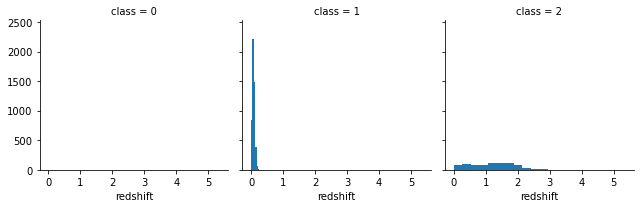

In [20]:
for i in ds_fin.columns:
    g = sns.FacetGrid(ds, col='class')
    g.map(plt.hist, i, bins=20)

above figures show distribution of independent variables according to dependent variable

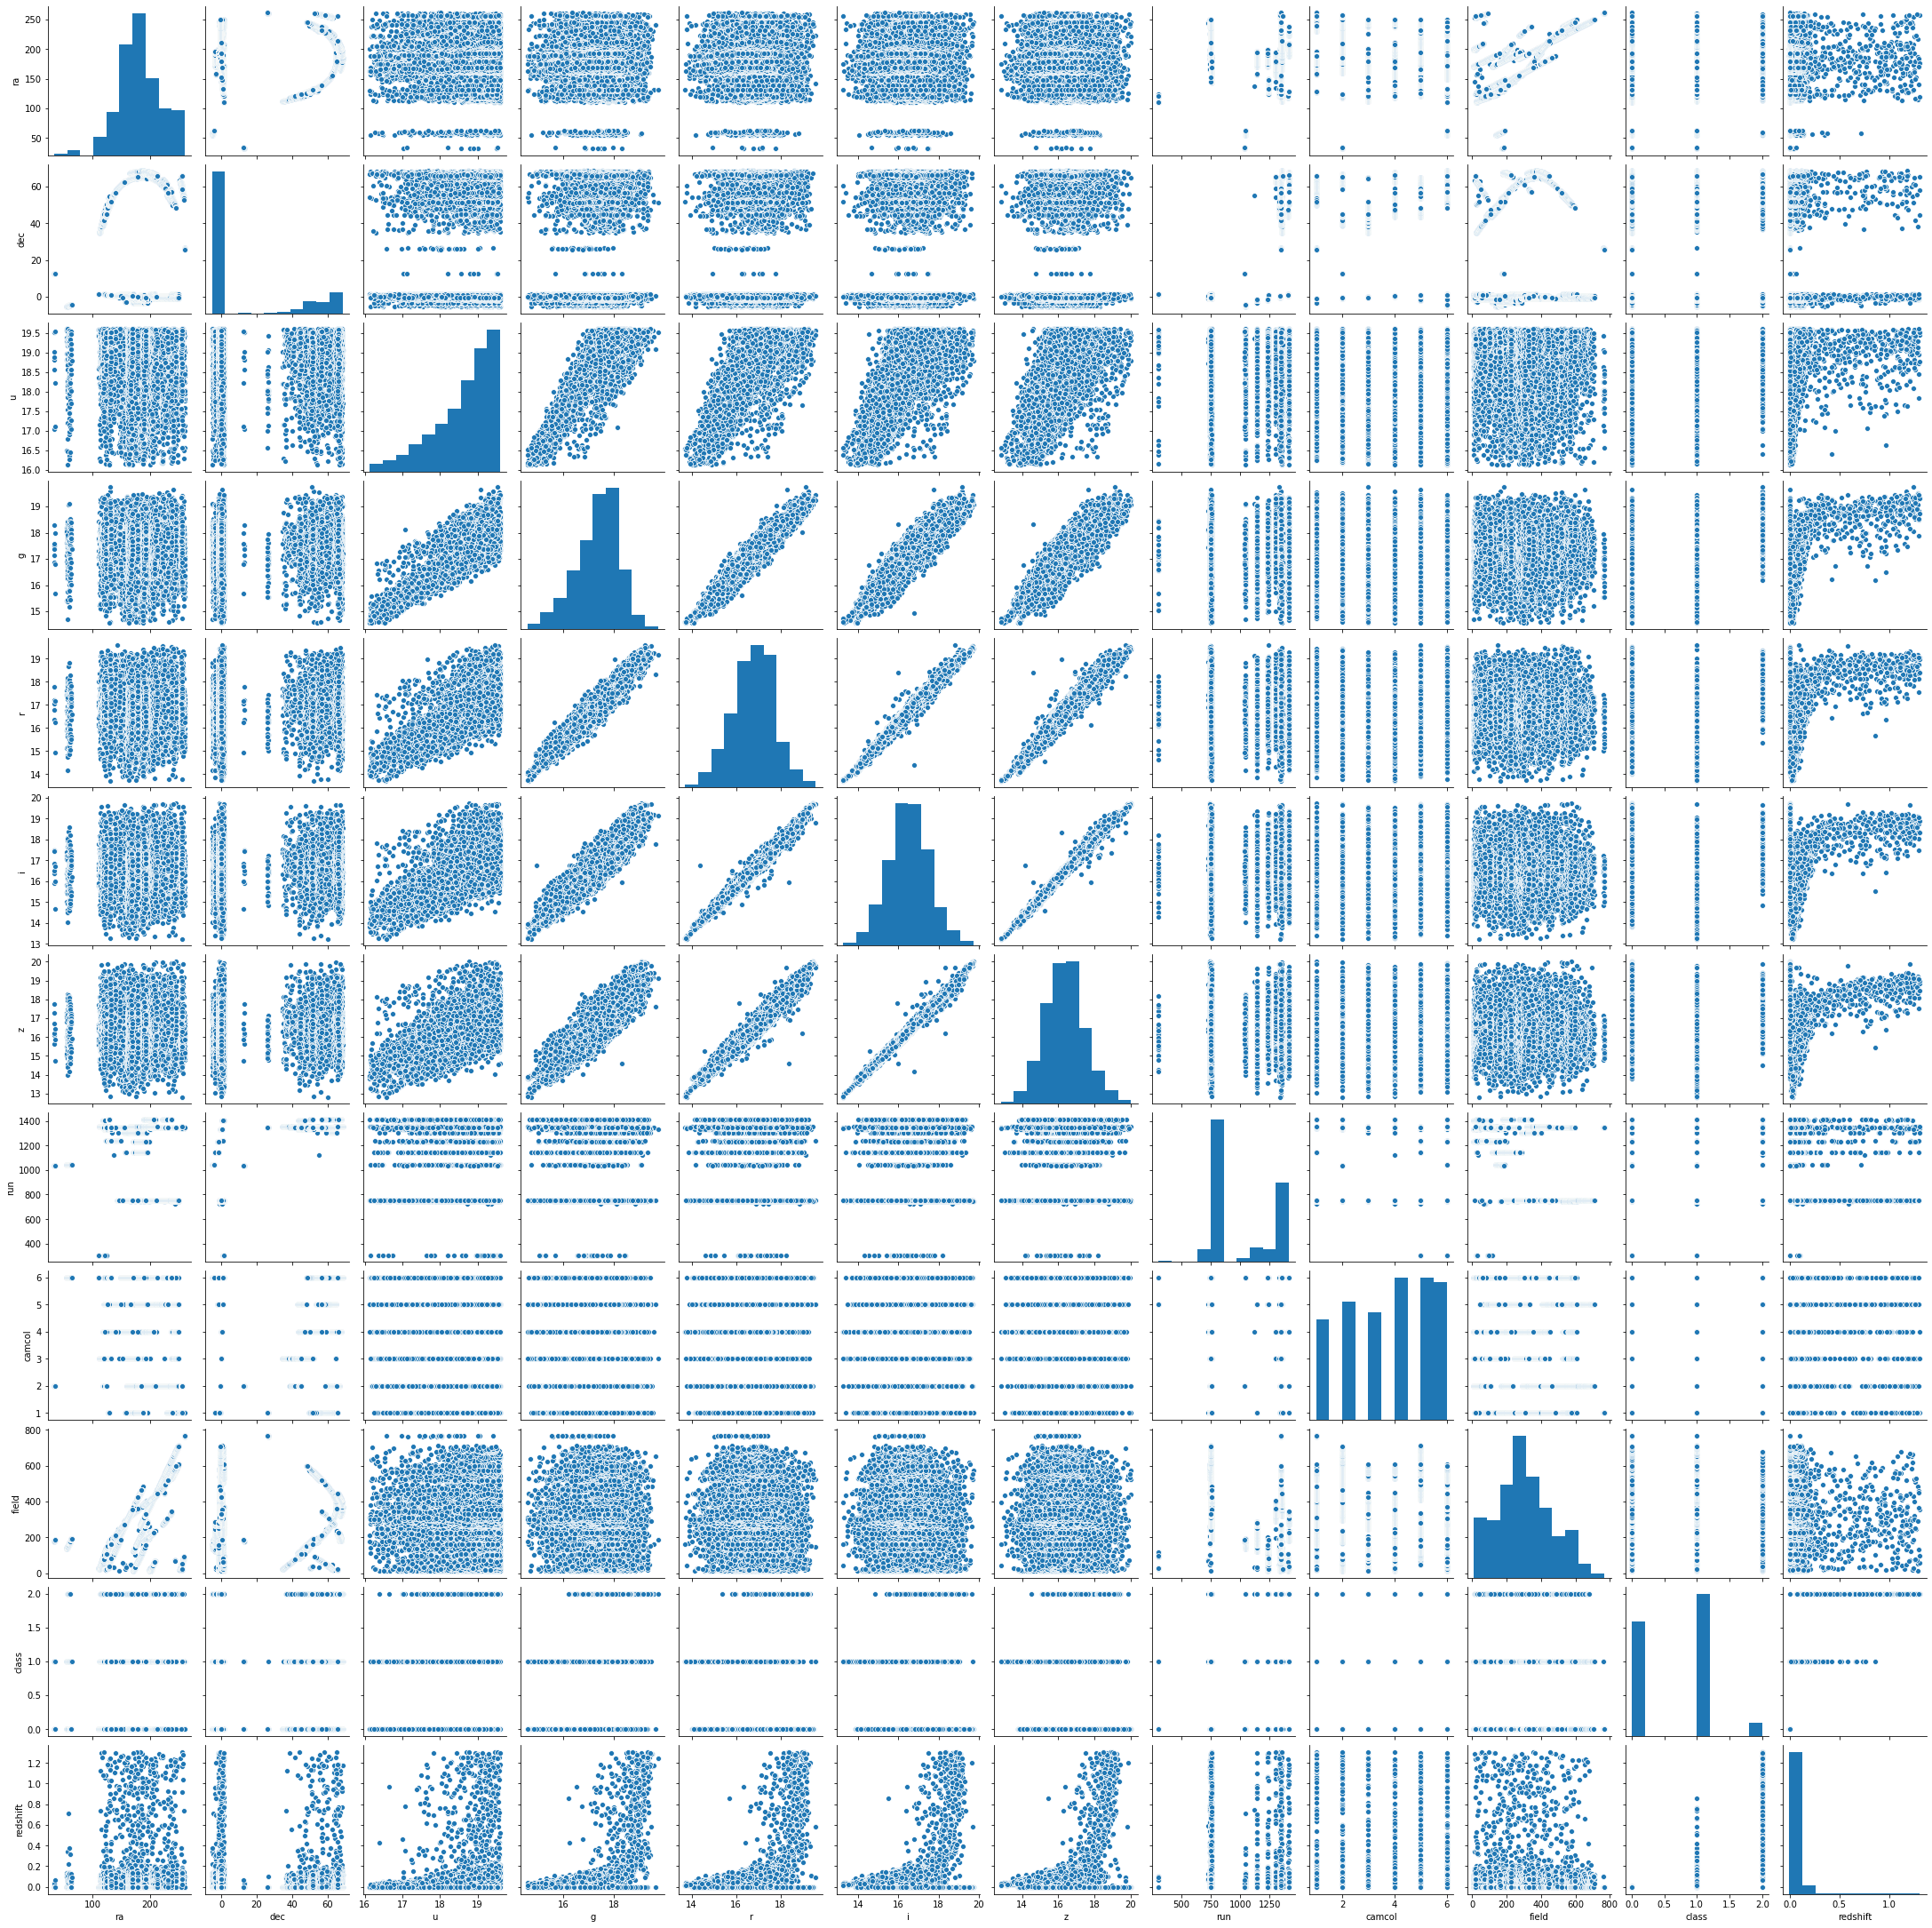

In [21]:
sns.pairplot(ds_fin)

In [22]:
corr_ds=ds_fin.corr()

In [23]:
corr_ds['class']

ra          0.025759
dec         0.084921
u           0.273371
g           0.264983
r           0.148740
i           0.064011
z          -0.008417
run         0.101989
camcol      0.009194
field      -0.024546
class       1.000000
redshift    0.635094
Name: class, dtype: float64

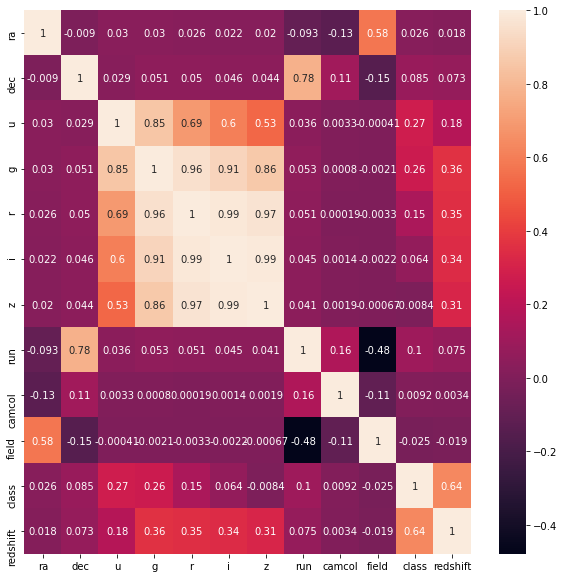

In [24]:
plt.figure(figsize=(10,10))
sns.heatmap(ds_fin.corr(),color='k',annot=True)

In [25]:
ds_fin.drop(['z','camcol'],axis=1,inplace=True)

C:\Users\atakle\Anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [26]:
ds_fin.head()

,ra,dec,u,g,r,i,run,field,class,redshift
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,752,267,0,-0.000009
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,752,267,0,-0.000055
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,752,268,1,0.123111
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,752,269,0,-0.000111
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,752,269,0,0.000590


In [27]:
ds_fin.describe()

,ra,dec,u,g,r,i,run,field,class,redshift
count,9097.000000,9097.000000,9097.000000,9097.000000,9097.000000,9097.000000,9097.000000,9097.000000,9097.000000,9097.000000
mean,181.720932,14.708930,18.633435,17.339402,16.786312,16.519413,977.493459,310.224360,0.622513,0.075636
std,36.822899,25.603811,0.780637,0.862646,0.961729,1.026285,278.348286,160.125911,0.575033,0.168207
min,32.458408,-5.382632,16.134120,14.568560,13.705140,13.232060,308.000000,11.000000,0.000000,-0.004136
25%,160.941521,-0.570171,18.179110,16.815140,16.173370,15.852340,752.000000,203.000000,0.000000,0.000082
50%,182.102318,0.343942,18.844900,17.468490,16.822340,16.517810,756.000000,302.000000,1.000000,0.040075
75%,202.750953,40.154982,19.254890,17.958320,17.449970,17.186200,1331.000000,419.000000,1.000000,0.086595
max,260.884382,68.542265,19.599900,19.738690,19.590280,19.744570,1412.000000,768.000000,2.000000,1.309529


In [30]:
num_col=['ra','dec','u','g','r','i','field']

In [31]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()  
ds_fin['run']=le.fit_transform(ds_fin['run'])
ds_fin.head()

<ipython-input-31-07077b15538f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_fin['run']=le.fit_transform(ds_fin['run'])


,ra,dec,u,g,r,i,run,field,class,redshift
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,3,267,0,-0.000009
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,3,267,0,-0.000055
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,3,268,1,0.123111
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,3,269,0,-0.000111
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,3,269,0,0.000590


In [32]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scale = sc.fit_transform(ds[num_col])
scale = pd.DataFrame(scale,columns=num_col)

In [33]:
ds_original=ds_fin
ds_fin=ds_fin.drop(columns=num_col,axis=1)
ds_fin=ds_fin.merge(scale,left_index=True,right_index=True,how='left')
ds_fin.head()

,run,class,redshift,ra,dec,u,g,r,i,field
0,3,0,-0.000009,0.167458,-0.584923,1.031486,-0.348559,-0.837280,-0.946058,-0.217630
1,3,0,-0.000055,0.168862,-0.583114,0.052430,-0.166533,-0.154155,-0.082645,-0.217630
2,3,1,0.123111,0.170574,-0.583475,0.921568,0.867093,0.593154,0.441201,-0.211479
3,3,0,-0.000111,0.174558,-0.586501,-1.030630,-0.813627,-0.636692,-0.526604,-0.205328
4,3,0,0.000590,0.174825,-0.584412,-1.290232,-1.172519,-0.376762,-0.025101,-0.205328


In [34]:
ds_fin=ds_fin[['redshift','ra','dec','u','g','r','i','field','class']]

In [35]:
ds_fin.head()

,redshift,ra,dec,u,g,r,i,field,class
0,-0.000009,0.167458,-0.584923,1.031486,-0.348559,-0.837280,-0.946058,-0.217630,0
1,-0.000055,0.168862,-0.583114,0.052430,-0.166533,-0.154155,-0.082645,-0.217630,0
2,0.123111,0.170574,-0.583475,0.921568,0.867093,0.593154,0.441201,-0.211479,1
3,-0.000111,0.174558,-0.586501,-1.030630,-0.813627,-0.636692,-0.526604,-0.205328,0
4,0.000590,0.174825,-0.584412,-1.290232,-1.172519,-0.376762,-0.025101,-0.205328,0


In [36]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import train_test_split

In [37]:
x=ds_fin.iloc[:,:-1]
y=ds_fin['class']
print(x.shape,y.shape)
#divide data in train and test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .22,random_state=43)

(9097, 8) (9097,)


In [39]:
from sklearn import svm

In [40]:
svc=svm.SVC()
svc.fit(x_train,y_train)
svc_pred = svc.predict(x_test)
print(accuracy_score(y_test,svc_pred))
print(confusion_matrix(y_test,svc_pred),classification_report(y_test,svc_pred))

0.922077922077922
[[836  38   0]
 [103 921   4]
 [  2   9  89]]               precision    recall  f1-score   support

           0       0.89      0.96      0.92       874
           1       0.95      0.90      0.92      1028
           2       0.96      0.89      0.92       100

    accuracy                           0.92      2002
   macro avg       0.93      0.91      0.92      2002
weighted avg       0.92      0.92      0.92      2002



In [42]:
from sklearn.model_selection import GridSearchCV
parameters = {'kernel':('linear','rbf'),'C':[0.01,0.1,1,10,100]}
svc=svm.SVC()
clf=GridSearchCV(svc,parameters)
clf.fit(x_train,y_train)
print(clf.best_score_)
print(clf.best_estimator_.kernel)
print(clf.best_params_)

0.9875968992248062
linear
{'C': 100, 'kernel': 'linear'}


In [43]:
svc=svm.SVC(kernel='linear',C=100)
svc.fit(x_train,y_train)
svc_pred = svc.predict(x_test)
print(accuracy_score(y_test,svc_pred))
print(confusion_matrix(y_test,svc_pred),classification_report(y_test,svc_pred))

0.9895104895104895
[[ 874    0    0]
 [  13 1010    5]
 [   0    3   97]]               precision    recall  f1-score   support

           0       0.99      1.00      0.99       874
           1       1.00      0.98      0.99      1028
           2       0.95      0.97      0.96       100

    accuracy                           0.99      2002
   macro avg       0.98      0.98      0.98      2002
weighted avg       0.99      0.99      0.99      2002



In [44]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
knn_pred=knn.predict(x_test)
print(accuracy_score(y_test,knn_pred))
print(confusion_matrix(y_test,knn_pred),classification_report(y_test,knn_pred))

0.8161838161838162
[[697 165  12]
 [166 861   1]
 [ 14  10  76]]               precision    recall  f1-score   support

           0       0.79      0.80      0.80       874
           1       0.83      0.84      0.83      1028
           2       0.85      0.76      0.80       100

    accuracy                           0.82      2002
   macro avg       0.83      0.80      0.81      2002
weighted avg       0.82      0.82      0.82      2002



In [45]:
parameters = {'n_neighbors':(3,5,7,9),'weights':('uniform','distance'),'leaf_size':(30,40,50)}
clf=GridSearchCV(knn,parameters)
clf.fit(x_train,y_train)
print(clf.best_score_)
print(clf.best_params_)

0.8314305849189569
{'leaf_size': 30, 'n_neighbors': 5, 'weights': 'distance'}


In [46]:
knn=KNeighborsClassifier(n_neighbors=5,weights='distance',leaf_size=30)
knn.fit(x_train,y_train)
knn_pred=knn.predict(x_test)
print(accuracy_score(y_test,knn_pred))
print(confusion_matrix(y_test,knn_pred),classification_report(y_test,knn_pred))

0.8261738261738262
[[708 158   8]
 [159 867   2]
 [ 12   9  79]]               precision    recall  f1-score   support

           0       0.81      0.81      0.81       874
           1       0.84      0.84      0.84      1028
           2       0.89      0.79      0.84       100

    accuracy                           0.83      2002
   macro avg       0.84      0.81      0.83      2002
weighted avg       0.83      0.83      0.83      2002



In [47]:
#finalize and save the model
import joblib
joblib.dump(svc,'spaceserver.pkl')

['spaceserver.pkl']